### Python notebook contains data loading, Exploratory Data Analysis (EDA), summary of EDA, Business Insights from EDA

In [1]:
# import libraries
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
warnings.filterwarnings("ignore")

In [ ]:
# Directory path
directory = r'C:\Priyanka\job_application_2024\JPMorganChase\Take Home Project'

In [2]:
# read the training data
data = pd.read_csv(os.path.join(directory, 'training_loan_data.csv'), header=1)
data.head(5)

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056.0,7550,36 months,16.24%,3 years,RENT,28000.0,NaN,debt_consolidation,...,0.0,17.0,72%,4000.0,NaN,3828.953801,5759.0,1,99,0.0
1,10000002,12002921.0,27050,36 months,10.99%,10+ years,OWN,55000.0,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,...,0.0,8.0,61.20%,35700.0,NaN,34359.940730,114834.0,1,353,0.0
2,10000003,11983096.0,12000,36 months,10.99%,4 years,RENT,60000.0,Borrower added on 12/31/13 > I would like to...,debt_consolidation,...,1.0,3.0,24%,18100.0,NaN,16416.617760,7137.0,1,157,0.0
3,10000004,12003142.0,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,NaN,debt_consolidation,...,1.0,3.0,54.60%,42200.0,NaN,38014.149760,799592.0,1,365,0.0
4,10000005,11993233.0,12000,36 months,13.53%,10+ years,RENT,40000.0,NaN,debt_consolidation,...,0.0,17.0,68.80%,7000.0,53.0,6471.462236,13605.0,1,157,0.0


### Initial Observation

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199121 entries, 0 to 199120
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           199121 non-null  int64  
 1   member_id                    189457 non-null  float64
 2   loan_amnt                    199121 non-null  int64  
 3   term                         189457 non-null  object 
 4   int_rate                     189457 non-null  object 
 5   emp_length                   181531 non-null  object 
 6   home_ownership               189457 non-null  object 
 7   annual_inc                   189457 non-null  float64
 8   desc                         82004 non-null   object 
 9   purpose                      189457 non-null  object 
 10  percent_bc_gt_75             180419 non-null  float64
 11  bc_util                      180333 non-null  float64
 12  dti                          189457 non-null  float64
 13 

In [67]:
data.describe(include='all').T #This function gives overview of categorical and numerical data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,199121.0,NaN,NaN,NaN,10098566.911205,57043.972099,10000001.0,10049582.0,10098227.0,10148007.0,10197787.0
member_id,189457.0,NaN,NaN,NaN,5929625.920367,3339821.824345,151536.0,2308792.0,6060627.0,8727745.0,12098992.0
loan_amnt,199121.0,NaN,NaN,NaN,14071.947334,8067.076636,1000.0,8000.0,12000.0,19600.0,35000.0
term,189457,2,36 months,144800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,189457,145,12.12%,9408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,181531,11,10+ years,61648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,189457,5,MORTGAGE,97647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,189457.0,NaN,NaN,NaN,72243.300905,51804.829944,4800.0,45000.0,62000.0,87000.0,7141778.0
desc,82004,80643,Borrower added on 09/05/13 > Debt consolidat...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,189457,13,debt_consolidation,112259,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Above table gives us initial observation of the data.**
- member_id is not unique in the dataset. There could be the reason of duplicate records or these members have taken multiple loans. We can confirm duplicate records and remove them.
- We wont need id and member_id columns for model training
- term column has only 2 categories, we can just create replace with 0 or 1 based on category
- int_rate and emp_length are shown as categorical columns with 145 and 11 categories respectively.We can analyze further and change it to numerical columns or use techniques like binning to combine into few categories
- desc column has >50% missing data as there are ~82K records filled with desc out of ~199k records.
- bad_flag (target variable) has mean of ~0.06 and std of ~0.25. This tells us that data is imbalanced. We can try difference oversampling/undersampling techniques later during model training. 
- Some of the columns including target variable has missing values. Analysis should be done to check if it is okay to remove the records with missing target variable value.

### **Exploratory Data Analysis (EDA)**
- Duplicate records removal
- Missing Value treatment
- Univariate, Bivariate Analysis of Numerical and categorical data
- correlation between variables
- Outlier Detection
- Observation and key Insights from EDA

##### Check and remove the duplicate records

In [196]:
# Find total number of duplicate records in the dataset
data.duplicated().sum()

0

In [197]:
data[data.duplicated()==True].head(5)

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag,emp_length_yr


In [198]:
# Confirming if id = 10049375 has multiple entries. 
data[data['id']==10049375]

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag,emp_length_yr
49374,10049375,8736263.0,16000,36 months,11.55,10+ years,RENT,70777.0,NaN,debt_consolidation,...,22.0,60.6,25300.0,NaN,25182.18502,43999.0,1,209,0.0,10


In [199]:
# Keep the first occurrence of the records and remove duplicates. 
data.drop_duplicates(keep='first', inplace=True)
data.reset_index(drop=True, inplace=True)
#Confirming if duplicates are dropped or not
print("Duplicate Records: {}".format(data.duplicated().sum()))
print("Total number of records in the dataset: {}".format(len(data)))

Duplicate Records: 0
Total number of records in the dataset: 188123


**Analysis of missing values of Target variable and other columns**

In [200]:
# Check which columns has missing values
data.isna().sum()

id                                  0
member_id                           0
loan_amnt                           0
term                                0
int_rate                            0
emp_length                       7877
home_ownership                      0
annual_inc                          0
desc                           106662
purpose                             0
percent_bc_gt_75                 9027
bc_util                          9111
dti                                 0
inq_last_6mths                      0
mths_since_recent_inq           27860
revol_util                        125
total_bc_limit                   7495
mths_since_last_major_derog    155626
tot_hi_cred_lim                  7495
tot_cur_bal                     27741
application_approved_flag           0
internal_score                      0
bad_flag                            0
emp_length_yr                    7877
dtype: int64

In [201]:
'''
Since target variable - bad_flag has missing values, lets check data in other columns where bad_flag is None and see if we should impute target variable 
or simply delete those records
'''
data[data['bad_flag'].isna()==True].isna().sum()

id                             0
member_id                      0
loan_amnt                      0
term                           0
int_rate                       0
emp_length                     0
home_ownership                 0
annual_inc                     0
desc                           0
purpose                        0
percent_bc_gt_75               0
bc_util                        0
dti                            0
inq_last_6mths                 0
mths_since_recent_inq          0
revol_util                     0
total_bc_limit                 0
mths_since_last_major_derog    0
tot_hi_cred_lim                0
tot_cur_bal                    0
application_approved_flag      0
internal_score                 0
bad_flag                       0
emp_length_yr                  0
dtype: int64

In [202]:
len(data[data['bad_flag'].isna()==True])/len(data)*100

0.0

From above analysis, it is clearly seen that - the records where bad_flag (target variable) is None, majority of features are also None with exact count of records including member id. Additionally, this subset comprise of <5% of total dataset size. Hence, it is safe to drop these records before doing any further analysis.

In [203]:
data.dropna(subset=['bad_flag'], inplace=True)
data[data['bad_flag'].isna()==True].isna().sum()

id                             0
member_id                      0
loan_amnt                      0
term                           0
int_rate                       0
emp_length                     0
home_ownership                 0
annual_inc                     0
desc                           0
purpose                        0
percent_bc_gt_75               0
bc_util                        0
dti                            0
inq_last_6mths                 0
mths_since_recent_inq          0
revol_util                     0
total_bc_limit                 0
mths_since_last_major_derog    0
tot_hi_cred_lim                0
tot_cur_bal                    0
application_approved_flag      0
internal_score                 0
bad_flag                       0
emp_length_yr                  0
dtype: int64

Define functions to plot various visualiation.

In [204]:
'''Below function will plot the barplot and print % on top'''
def plot_barplot(data, col_name):
    '''
    data: dataframe
    col_name: dataframe column
    '''

    total = len(data[col_name])  # length of the column
    count = data[col_name].nunique()
    plt.figure(figsize=(count + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=col_name,
        palette="Paired",
        order=data[col_name].value_counts().index[:].sort_values(),
    )

    for p in ax.patches:
        label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


In [205]:
# function to plot stacked bar chart

def stacked_barplot(data, col_name, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    col_name: independent variable or feature
    target: target variable
    """
    count = data[col_name].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[col_name], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[col_name], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [206]:
'''Below function will plot the histogram and boxplot '''

def histogram_boxplot(data, col_name, figsize=(15, 10), bins=None):
    '''
    data: dataframe
    col_name: dataframe column
    bins: number of bins for histogram (default None)
    '''
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=(15, 10),
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=col_name, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=col_name, kde=True, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=col_name, kde=True, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[col_name].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[col_name].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [207]:

def distribution_plot_wrt_target(data, col_name, target):
    """
    Print the histplot and box plot of features vs target variable

    data: dataframe
    col_name: independent variable or feature
    target: target variable
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(data=data[data[target] == target_uniq[0]], x=col_name, kde=True, ax=axs[0, 0], color="teal", stat="count", legend=True)

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(data=data[data[target] == target_uniq[1]], x=col_name, kde=True, ax=axs[0, 1], color="orange", stat="count", legend=True)

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=col_name, ax=axs[1, 0], palette="gist_rainbow")
    
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(data=data, x=target, y=col_name,  ax=axs[1, 1], showfliers=False, palette="gist_rainbow") #showfliers=False Outliers will be hidden

    plt.tight_layout()
    plt.show()

In [208]:
#Function to compute the % distribution of column w.r.t target variable. 
def compute_perc_distribution(data, col_name, target):
    print("Column Name:" + col_name)
    colvalues = data[col_name].unique()
    for value in colvalues:
        print("\nCategory: " + str(value))
        total = data[data[col_name] == value][target].count()
        attrition_yes = data[data[col_name] == value][data[target]==1][target].count()
        attrition_no = data[data[col_name] == value][data[target]==0][target].count()
        print(target + " % Yes =" +  str(attrition_yes/total*100))
        print(target + " % No =" +  str(attrition_no/total*100))

**Analysis of term**

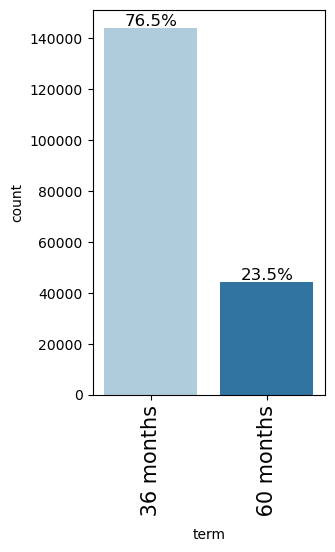

In [209]:
plot_barplot(data, 'term')
#Observation: term should be categorical column and will perform encoding during model training

bad_flag       0.0    1.0     All
term                             
All         174995  13128  188123
 36 months  134594   9256  143850
 60 months   40401   3872   44273
------------------------------------------------------------------------------------------------------------------------


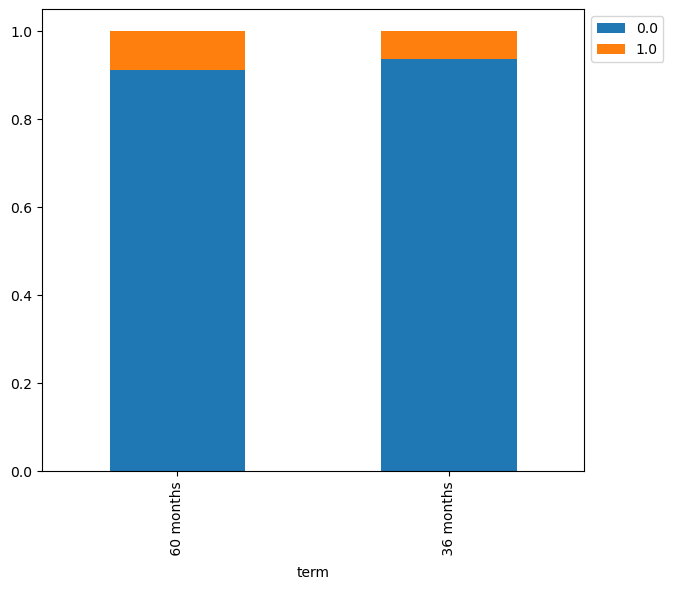

In [210]:

stacked_barplot(data, "term", "bad_flag")

**int_rate and revol_util features analysis**
- from above initial observation, the int_rate & revol_util are considered as categorical with 145 and 1068 categories respectively. 
- We can simply remove the '%' from it and convert it into float.

In [ ]:
# Convert interest rate to numeric by removing the percentage sign
data['int_rate'] = data['int_rate'].str.replace('%', '').astype(float)


In [236]:
data['int_rate'].describe()

count    188123.000000
mean         14.279068
std           4.436916
min           6.000000
25%          11.140000
50%          14.090000
75%          17.270000
max          26.060000
Name: int_rate, dtype: float64

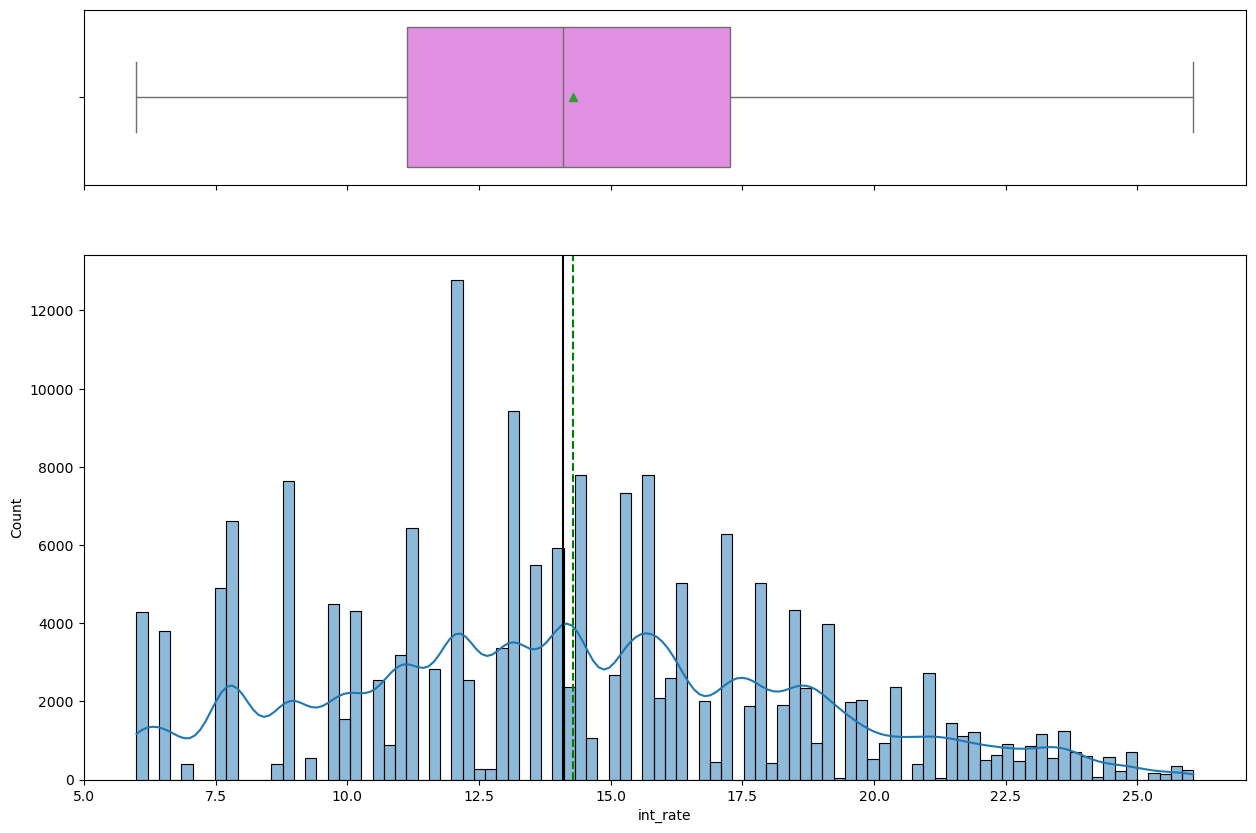

In [ ]:
histogram_boxplot(data, 'int_rate')

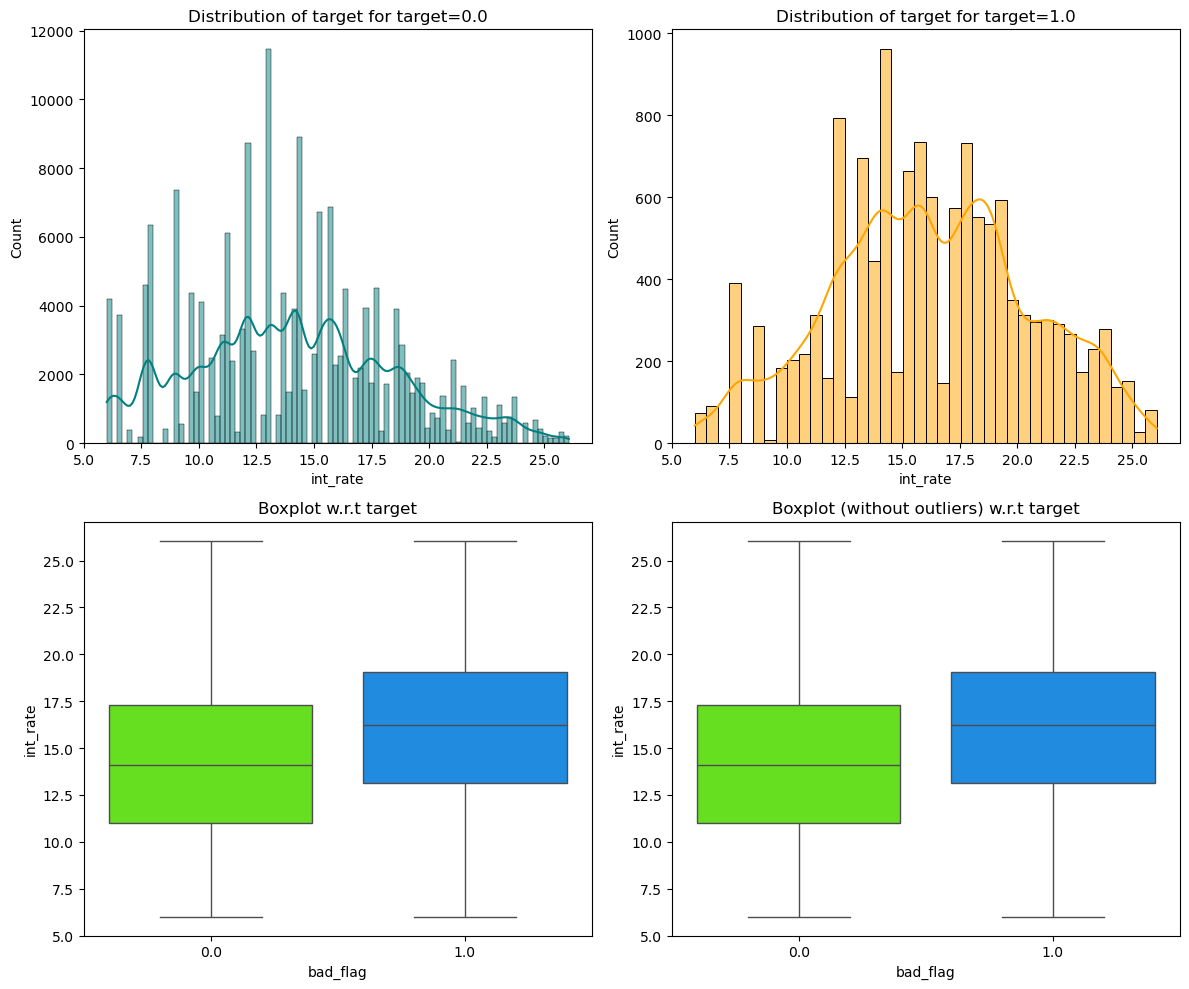

In [48]:
distribution_plot_wrt_target(data, "int_rate", "bad_flag")

Observation: The distribution shape is normal when laon is default or not. But average interate is higher when loan is defualted. 

**emp_length column Analysis**
- as per initial observation, the emp_length is categorical column. Lets check how many categories are there and proportion of those categories against target variable. 
- LEts try to see if we can combine multiple categories into one and if there is any impact in the proportion against target variable.

In [104]:
data['emp_length'].value_counts(dropna=False)

emp_length
10+ years    61175
2 years      16143
5 years      14265
3 years      13965
< 1 year     13222
6 years      11916
1 year       11434
7 years      11207
4 years      10846
8 years       8950
NaN           7877
9 years       7123
Name: count, dtype: int64

bad_flag       0.0    1.0     All
emp_length                       
All         167775  12471  180246
10+ years    57429   3746   61175
2 years      14993   1150   16143
< 1 year     12144   1078   13222
5 years      13233   1032   14265
3 years      12994    971   13965
6 years      11001    915   11916
4 years       9980    866   10846
1 year       10619    815   11434
7 years      10415    792   11207
8 years       8343    607    8950
9 years       6624    499    7123
------------------------------------------------------------------------------------------------------------------------


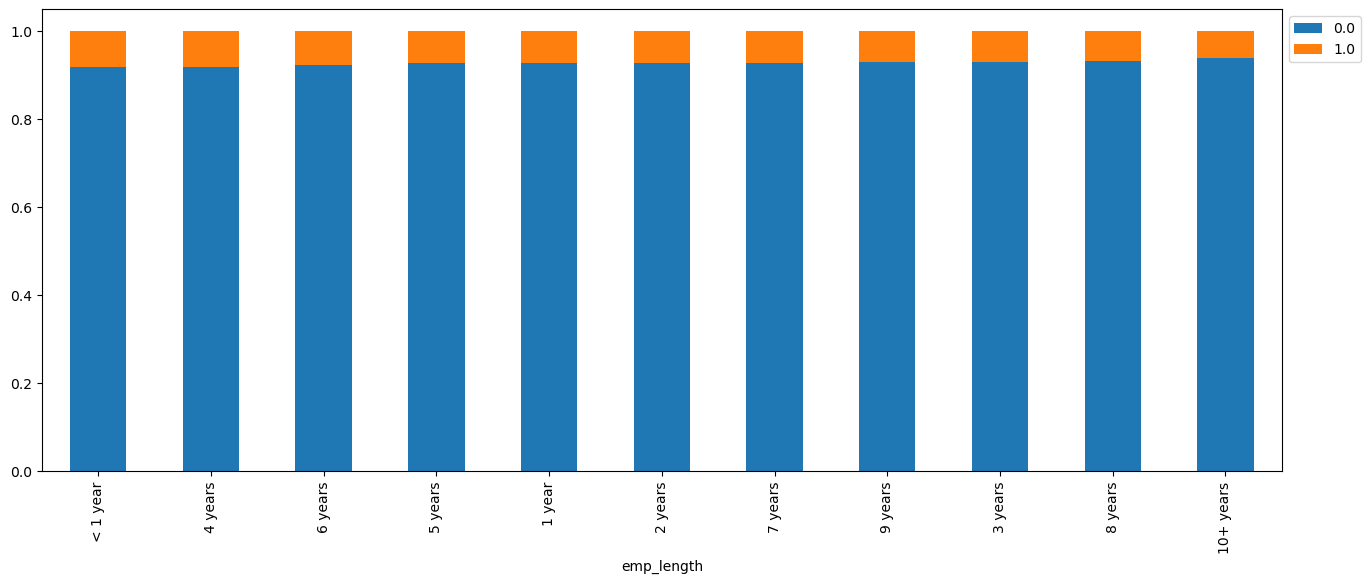

Column Name:emp_length

Category: 3 years
bad_flag % Yes =6.953097028284998
bad_flag % No =93.04690297171501

Category: 10+ years
bad_flag % Yes =6.123416428279526
bad_flag % No =93.87658357172047

Category: 4 years
bad_flag % Yes =7.984510418587498
bad_flag % No =92.0154895814125

Category: 5 years
bad_flag % Yes =7.234490010515247
bad_flag % No =92.76550998948476

Category: 2 years
bad_flag % Yes =7.123830762559622
bad_flag % No =92.87616923744038

Category: 7 years
bad_flag % Yes =7.067011689122869
bad_flag % No =92.93298831087714

Category: 6 years
bad_flag % Yes =7.678751258811682
bad_flag % No =92.32124874118833

Category: 1 year
bad_flag % Yes =7.127864264474375
bad_flag % No =92.87213573552563

Category: 9 years
bad_flag % Yes =7.005475221114699
bad_flag % No =92.9945247788853

Category: < 1 year
bad_flag % Yes =8.153078202995008
bad_flag % No =91.84692179700498

Category: 8 years
bad_flag % Yes =6.782122905027934
bad_flag % No =93.21787709497207

Category: nan
bad_flag % Yes =

In [ ]:
stacked_barplot(data, "emp_length", "bad_flag")
compute_perc_distribution(data, "emp_length", "bad_flag")

Above chart shows its almost same proportion of data for all categories for target variable as 0 or 1. lets combine records with <10 years into one category
and see if any changes in the proportion.

In [105]:
emp_years = data.copy()
emp_years.loc[emp_years['emp_length']!='10+ years','emp_length']='<10 years'

bad_flag       0.0    1.0     All
emp_length                       
All         174995  13128  188123
<10 years   117566   9382  126948
10+ years    57429   3746   61175
------------------------------------------------------------------------------------------------------------------------


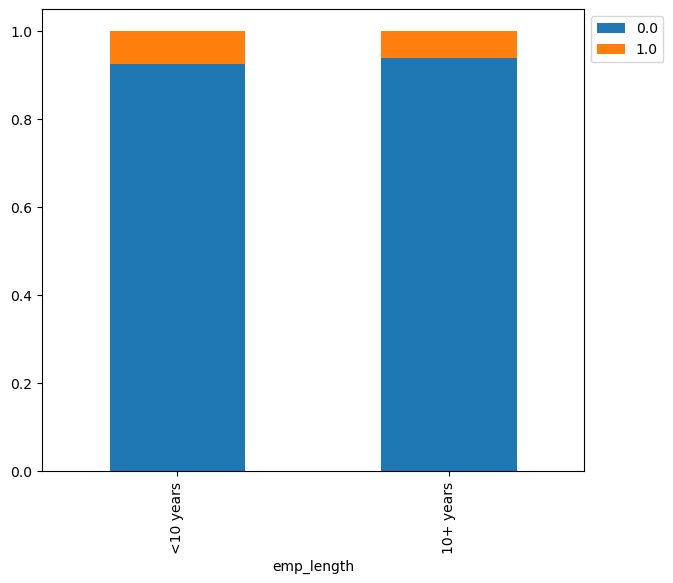

Column Name:emp_length

Category: <10 years
bad_flag % Yes =7.390427576645556
bad_flag % No =92.60957242335445

Category: 10+ years
bad_flag % Yes =6.123416428279526
bad_flag % No =93.87658357172047


In [ ]:
stacked_barplot(emp_years, "emp_length", "bad_flag")
compute_perc_distribution(emp_years, "emp_length", "bad_flag")

Its clearly shows that that, there is no much change in the proportion, but the total records increased for <10 years. Instead of combining into two categories, we can do label encoding as this column can be considered as ordinal category (Meaning, the order can be meanining For e.g. 1 year experience < 10 years of experience>).



In [ ]:
data.loc[data['emp_length'] == '< 1 year', 'emp_length'] = '0 year'
data['emp_length_yr'] = data['emp_length'].str.extract(r'(\d+)')

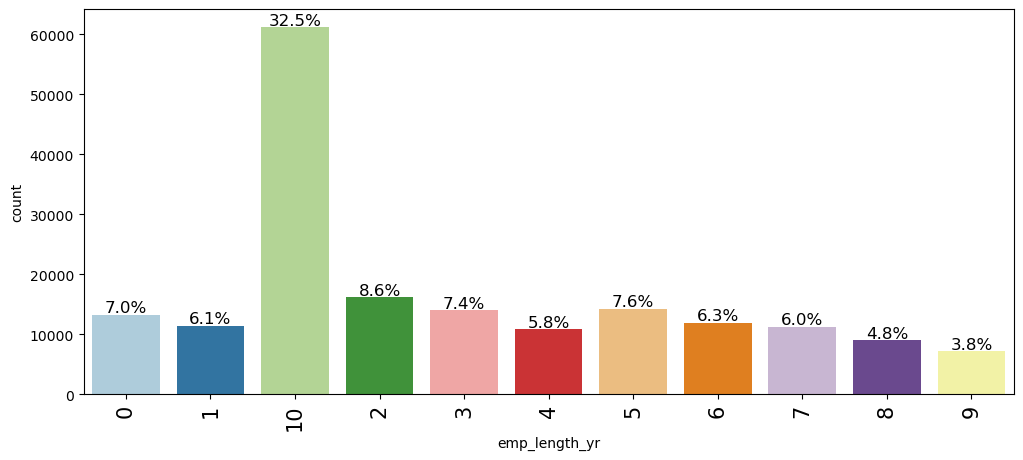

In [ ]:
plot_barplot(data, 'emp_length_yr')

**home_ownership and purpose feature analysis**

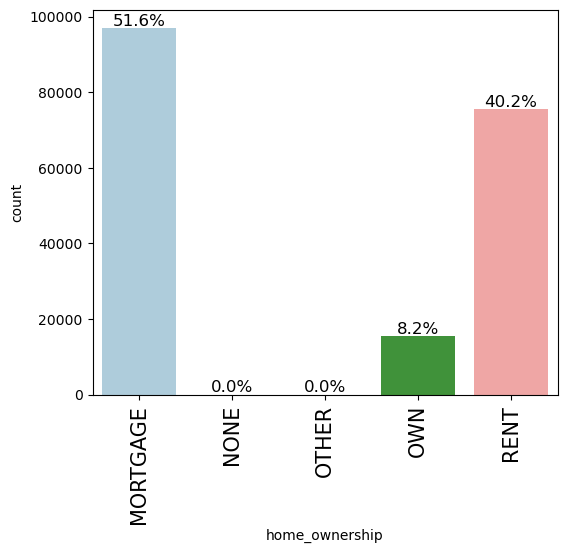

In [84]:
plot_barplot(data, 'home_ownership')

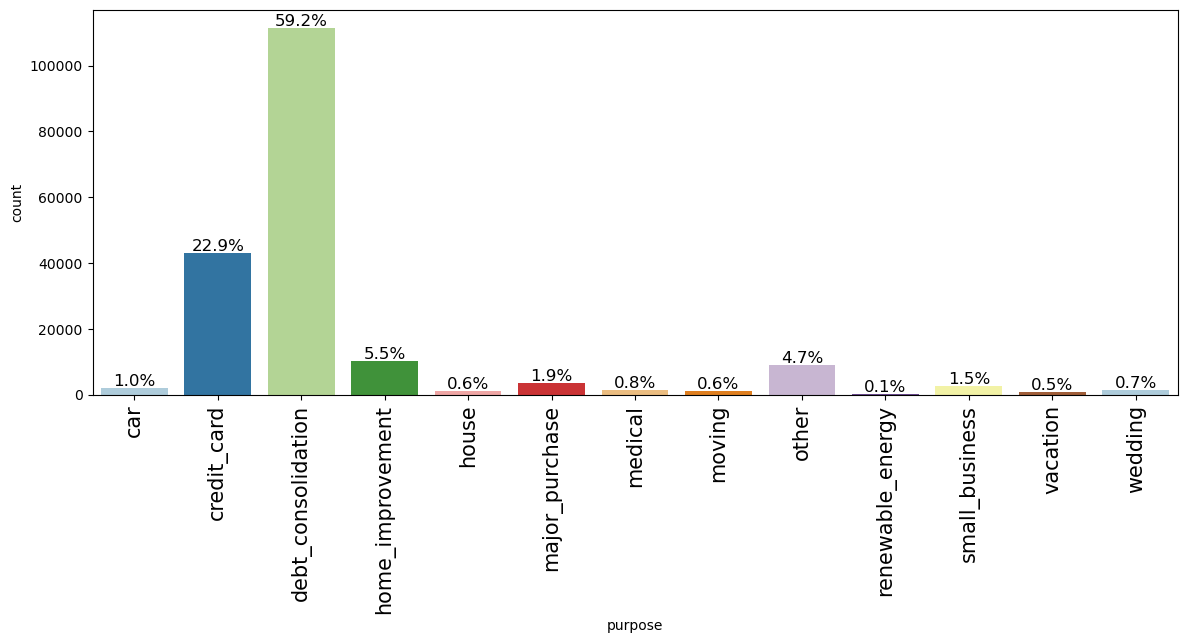

purpose
debt_consolidation    111436
credit_card            43143
home_improvement       10293
other                   8891
major_purchase          3655
small_business          2744
car                     1950
medical                 1518
wedding                 1330
house                   1093
moving                  1038
vacation                 910
renewable_energy         122
Name: count, dtype: int64

In [126]:
plot_barplot(data, 'purpose')
data['purpose'].value_counts(dropna=False)

For both purpose and home_ownership features, we can combine minority categories into 'other' to reduce the dimentionality. Later, one-hot encoding can be done while mode training.

In [ ]:
data.loc[data['home_ownership'].isin(['OTHER', 'OWN']), 'home_ownership'] = 'OTHER'
data['home_ownership'].value_counts(dropna=False)

home_ownership
MORTGAGE    96979
RENT        75609
OTHER       15493
NONE           42
Name: count, dtype: int64

In [127]:
data.loc[~data['purpose'].isin(['debt_consolidation', 'credit_card']), 'purpose'] = 'other'
data['purpose'].value_counts(dropna=False)

purpose
debt_consolidation    111436
credit_card            43143
other                  33544
Name: count, dtype: int64

**Application Approved Flag feature Analysis**

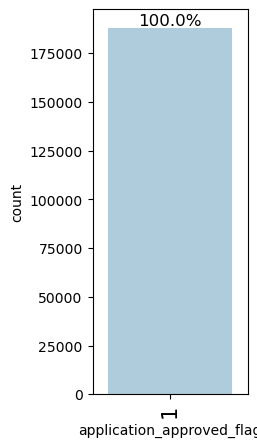

application_approved_flag
1    188123
Name: count, dtype: int64

In [ ]:
plot_barplot(data, 'application_approved_flag')
data['application_approved_flag'].value_counts(dropna=False)

Since the feature has only one category (i.e 1), we can ignore the column in training dataset.

**revol_util feature analysis**

In [128]:
# Convert interest rate to numeric by removing the percentage sign
data['revol_util'] = data['revol_util'].str.replace('%', '').astype(float)
data['revol_util'].describe()

count    187998.000000
mean         58.386538
std          23.009050
min           0.000000
25%          42.500000
50%          60.500000
75%          76.600000
max         140.400000
Name: revol_util, dtype: float64

**Data Correlation and outlier detection**

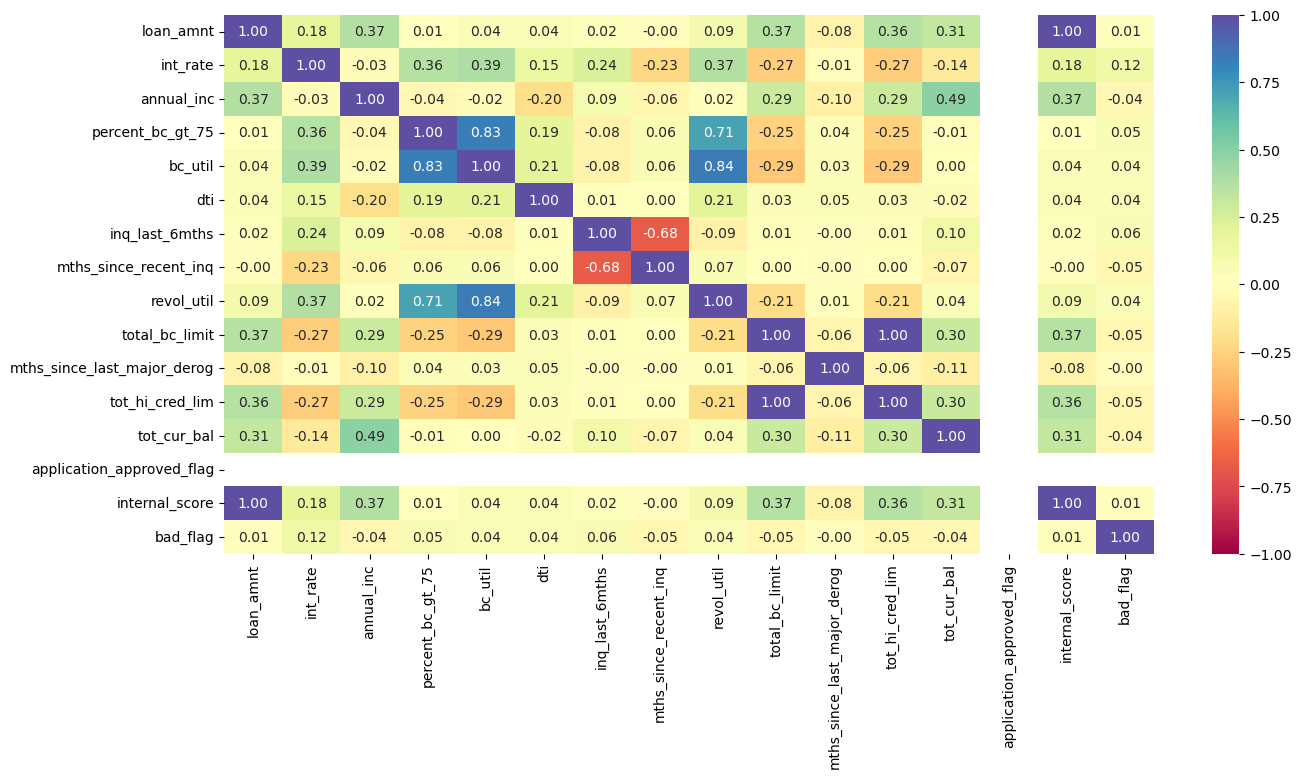

In [142]:
num_col = data.select_dtypes(include=np.number).columns.tolist()

num_col = [name for name in num_col if name not in ['id', 'member_id', 'application_apporved_flag']]
plt.figure(figsize=(15, 7))
sns.heatmap(data[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

 Based on correlation heat-map, we can clearly see that - below three features are highly co-related.
 - percent_bc_gt_75: Percentage of all bankcard accounts > 75% of limit.
 - bc_util: Ratio of total current balance to high credit/credit limit for all bankcard accounts.
 - revol_util: Revolving line utilization rate or the amount of credit the borrower is using relative to all available revolving credit.

internal_score and loan_amnt are highly correlated.
- internal_score: An third party vendor's risk score generated when the application is made
- loan_amnt: The listed amount of the loan applied for by the borrower. 

 We also found out that - below two features are negatively correlated.
- inq_last_6mths: The number of inquiries by creditors during the past 6 months.
- mths_since_recent_inq: Months since most recent inquiry.


Lets first perform the outlier detection and distribution against target variable of all these features

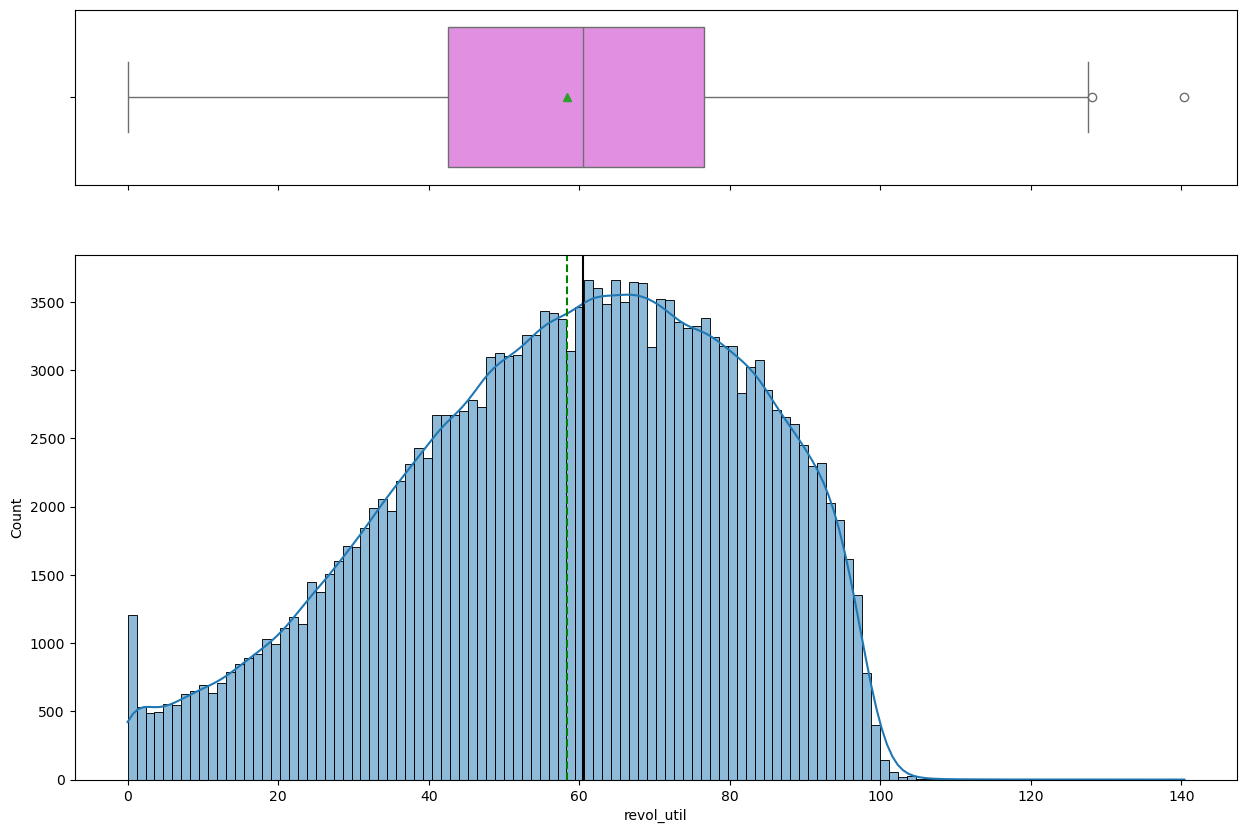

In [129]:
histogram_boxplot(data, 'revol_util')

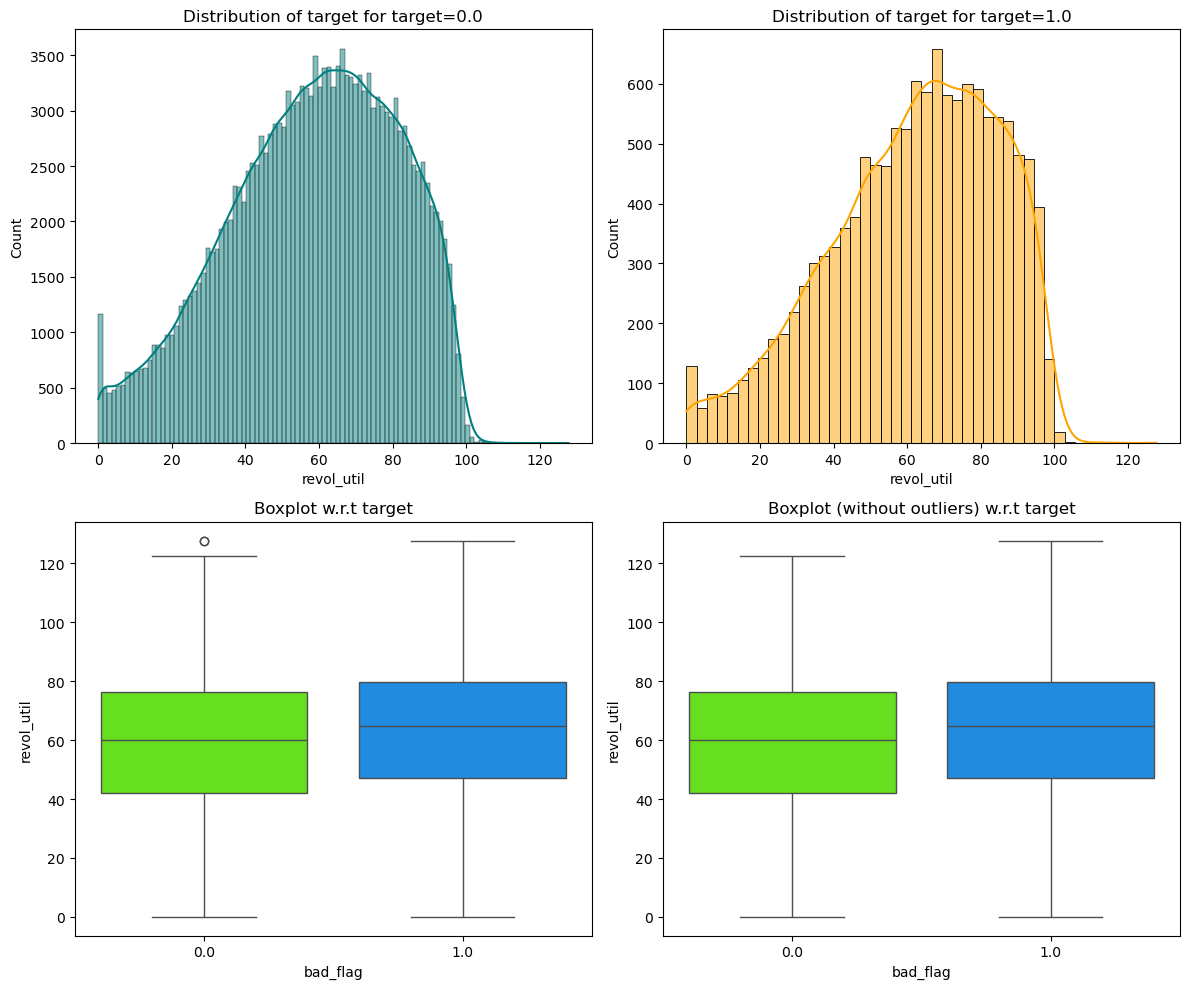

In [ ]:
distribution_plot_wrt_target(data, "revol_util", "bad_flag")

revol_util feature presents the outlier, but when comparing for target variable, the data distribution is same as well as data is within IQR for both 0 and 1 values.

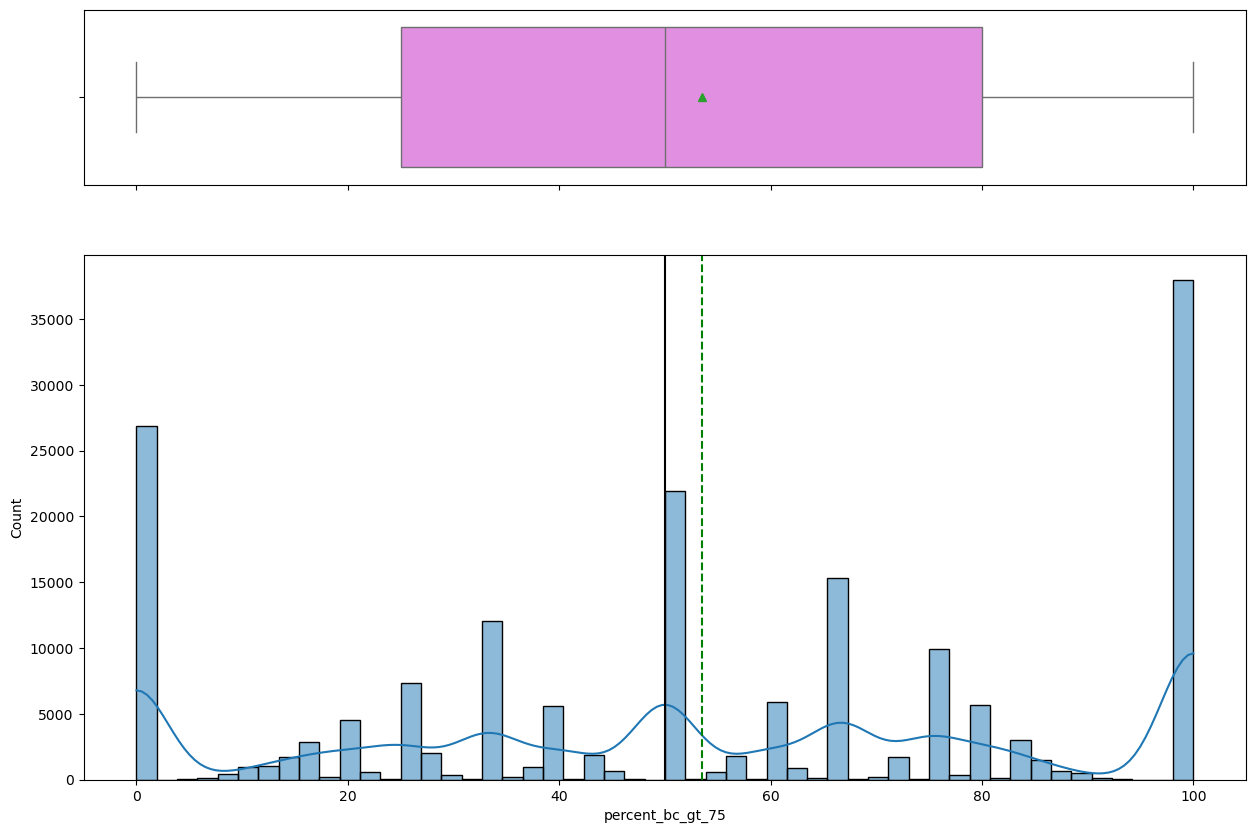

In [188]:
histogram_boxplot(data, 'percent_bc_gt_75')

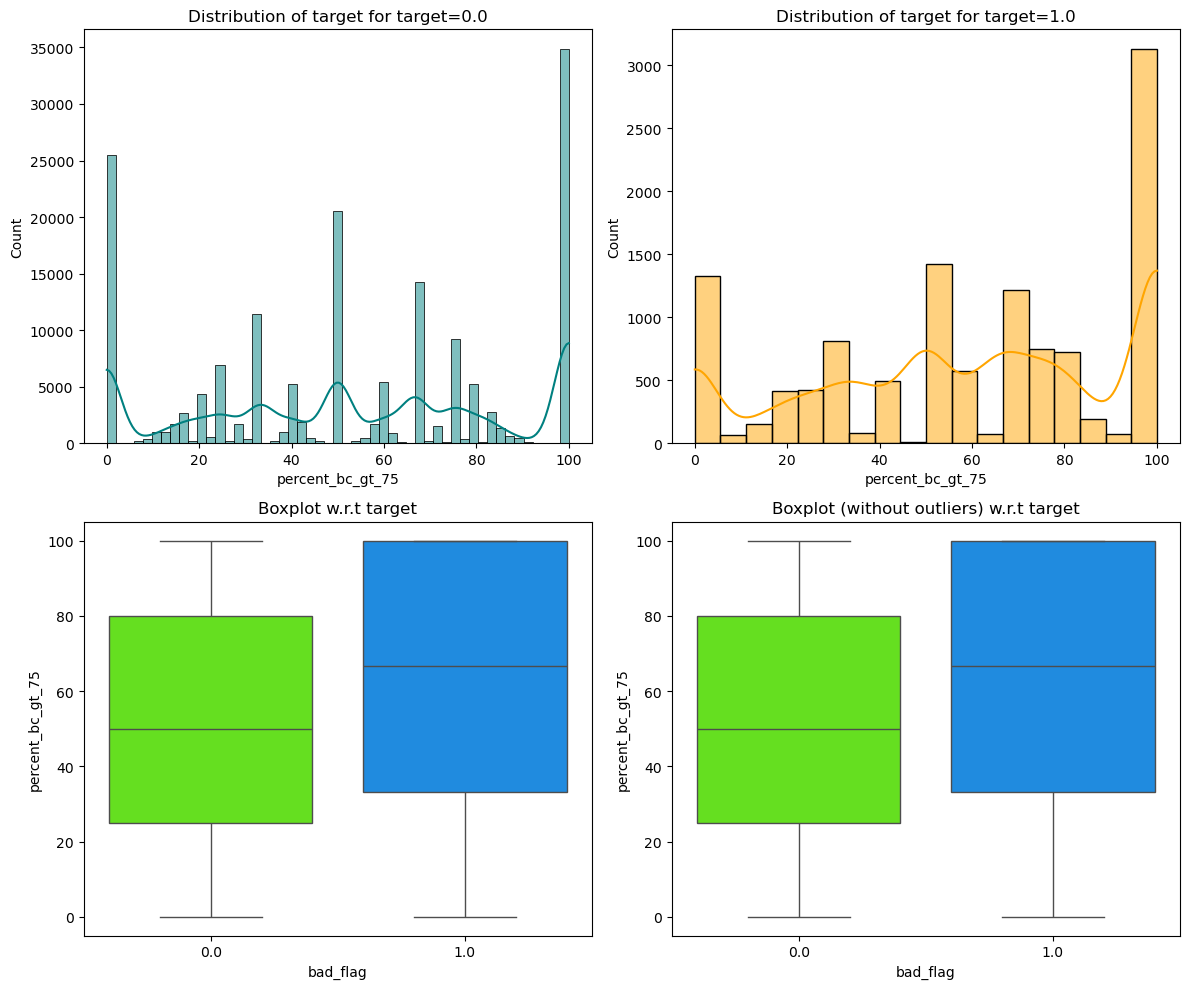

In [189]:
distribution_plot_wrt_target(data, "percent_bc_gt_75", "bad_flag")

percent_bc_gt_75 feature does not have outlier, but when comparing for target variable, data is distributed in different IQR values for target variable 0 and 1. 
That means, for bad loan, the Percentage of all bankcard accounts > 75% of limit is higher than the applicants without bad loan. We can consider this feature for the model training.

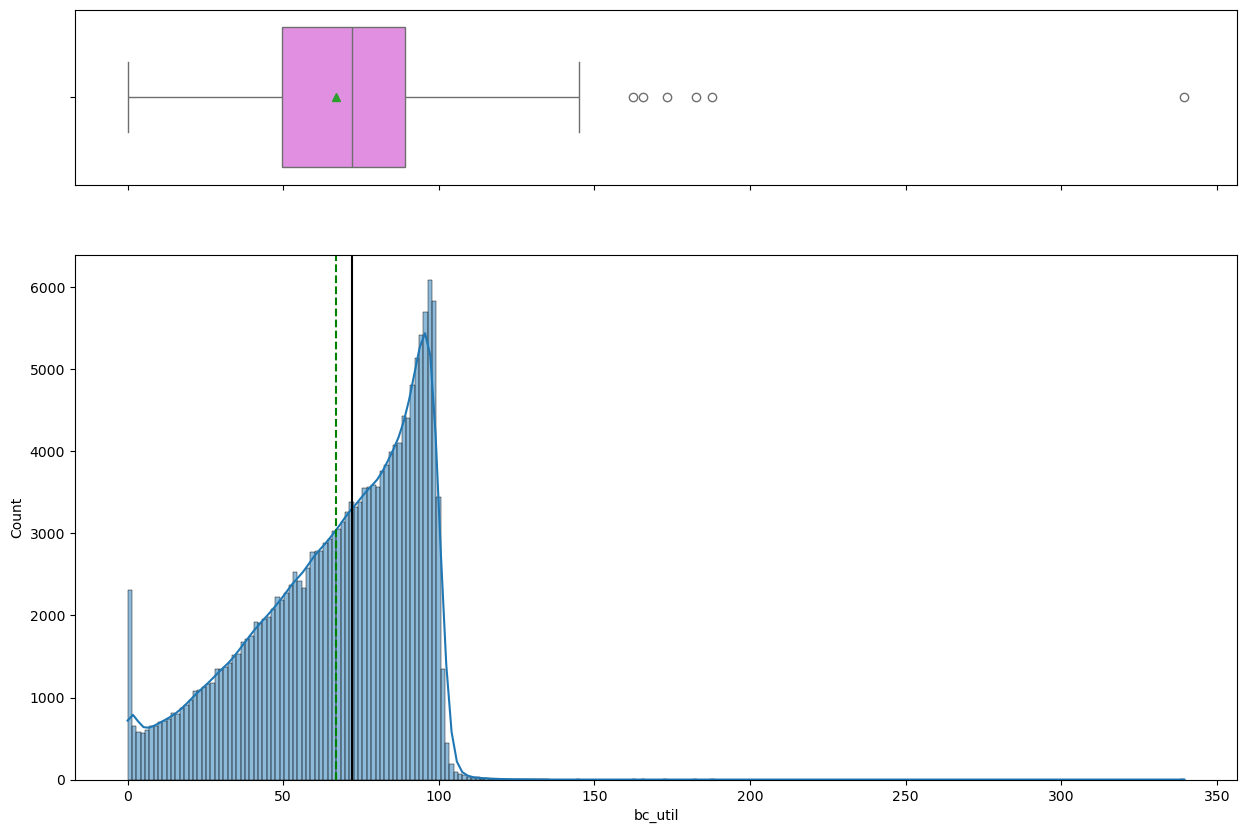

In [ ]:
histogram_boxplot(data, 'bc_util')

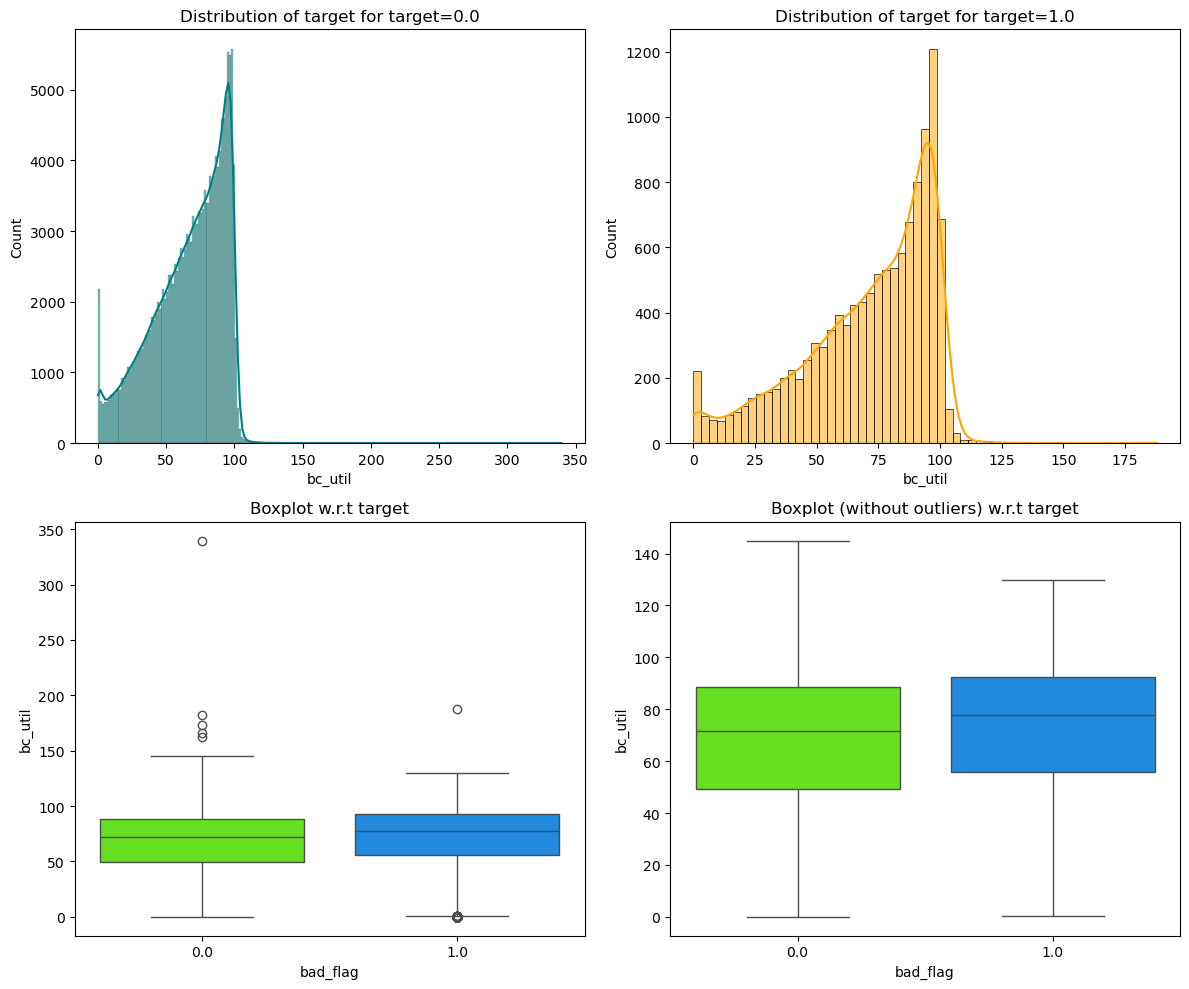

In [187]:
distribution_plot_wrt_target(data, "bc_util", "bad_flag")

bc_util feature has outliers and data is left skewed, When comparing for target variable, there is similar data distribution for target variable 0 or 1. Also, if we treat outlier or without treating outlier, the data is almost at same IQR.
That means, ratio of total current balance to high credit/credit limit for all bankcard accounts is same for bad_flag = 1 or 0. 


**inq_last_6mths and mths_since_recent_inq**

bad_flag                  0.0    1.0     All
mths_since_recent_inq                       
All                    149193  11070  160263
1.0                     15651   1658   17309
0.0                     12774   1360   14134
2.0                     12788   1091   13879
3.0                     11340    934   12274
4.0                     10444    775   11219
5.0                      9643    685   10328
6.0                      8708    610    9318
7.0                      8652    576    9228
8.0                      7759    480    8239
9.0                      7151    394    7545
10.0                     6112    364    6476
12.0                     5029    308    5337
11.0                     5544    303    5847
13.0                     4344    259    4603
14.0                     3892    218    4110
15.0                     3207    166    3373
16.0                     2733    158    2891
18.0                     2165    135    2300
17.0                     2474    125    2599
20.0      

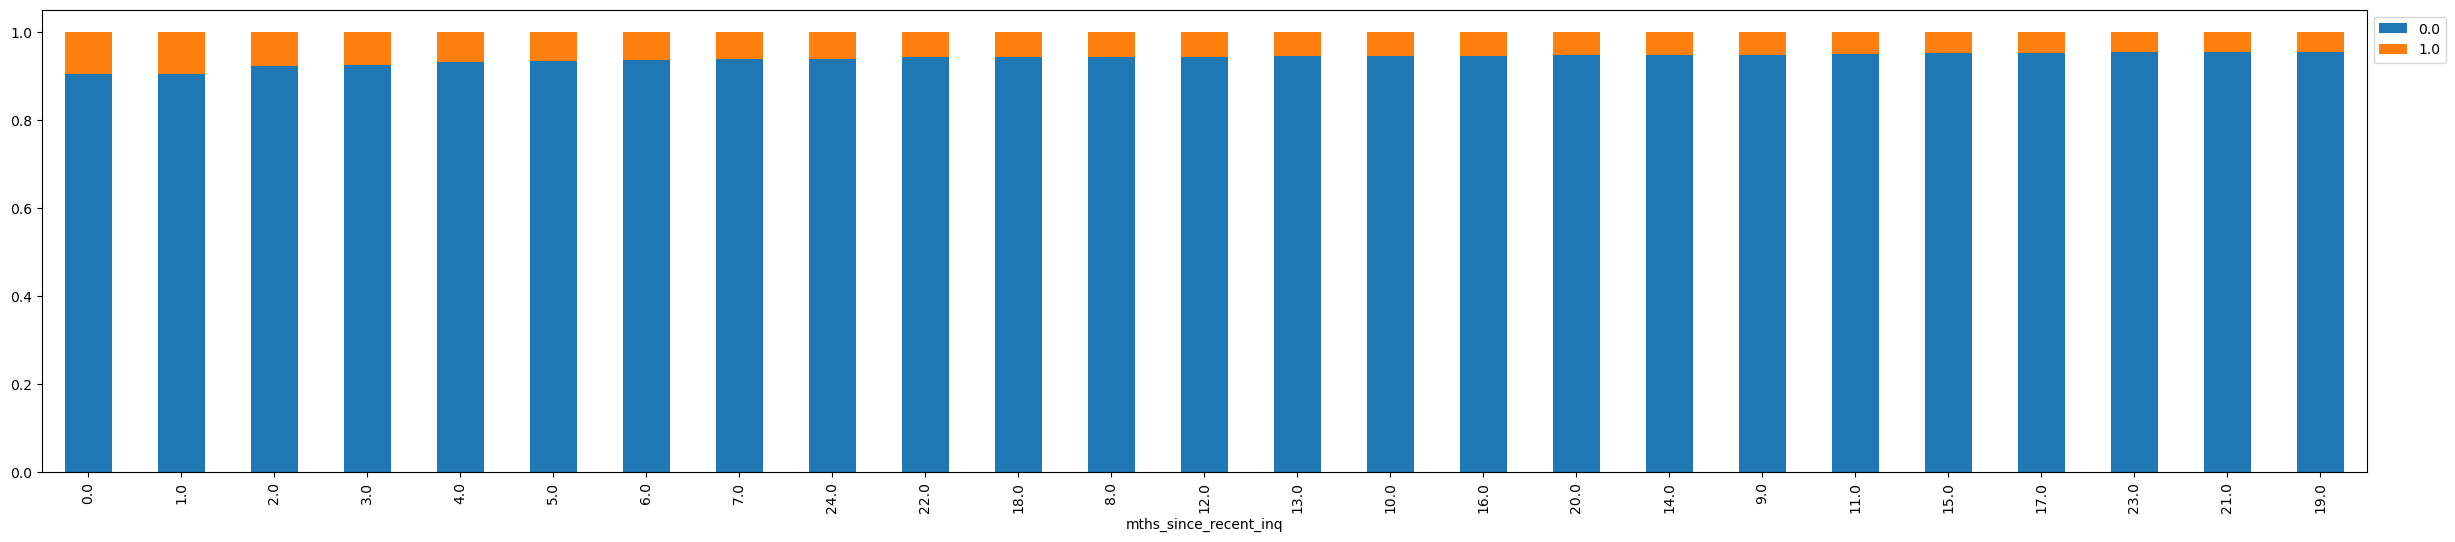

Column Name:mths_since_recent_inq

Category: 17.0
bad_flag % Yes =4.8095421315890725
bad_flag % No =95.19045786841093

Category: 8.0
bad_flag % Yes =5.825949751183396
bad_flag % No =94.1740502488166

Category: 3.0
bad_flag % Yes =7.6095812286133295
bad_flag % No =92.39041877138668

Category: 14.0
bad_flag % Yes =5.304136253041363
bad_flag % No =94.69586374695864

Category: 0.0
bad_flag % Yes =9.622187632658836
bad_flag % No =90.37781236734116

Category: 6.0
bad_flag % Yes =6.546469199399013
bad_flag % No =93.45353080060099

Category: 2.0
bad_flag % Yes =7.860796887383817
bad_flag % No =92.13920311261619

Category: 7.0
bad_flag % Yes =6.241872561768531
bad_flag % No =93.75812743823147

Category: 12.0
bad_flag % Yes =5.77103241521454
bad_flag % No =94.22896758478547

Category: 10.0
bad_flag % Yes =5.620753551575047
bad_flag % No =94.37924644842496

Category: 4.0
bad_flag % Yes =6.90792405740262
bad_flag % No =93.09207594259738

Category: 11.0
bad_flag % Yes =5.182144689584402
bad_flag % 

In [ ]:
stacked_barplot(emp_years, "mths_since_recent_inq", "bad_flag")
compute_perc_distribution(emp_years, "mths_since_recent_inq", "bad_flag")

bad_flag           0.0    1.0     All
inq_last_6mths                       
All             174995  13128  188123
0.0              90431   5404   95835
1.0              49100   3964   53064
2.0              22344   2219   24563
3.0               9951   1236   11187
4.0               2150    191    2341
5.0                695     73     768
6.0                307     38     345
7.0                 11      2      13
8.0                  6      1       7
------------------------------------------------------------------------------------------------------------------------


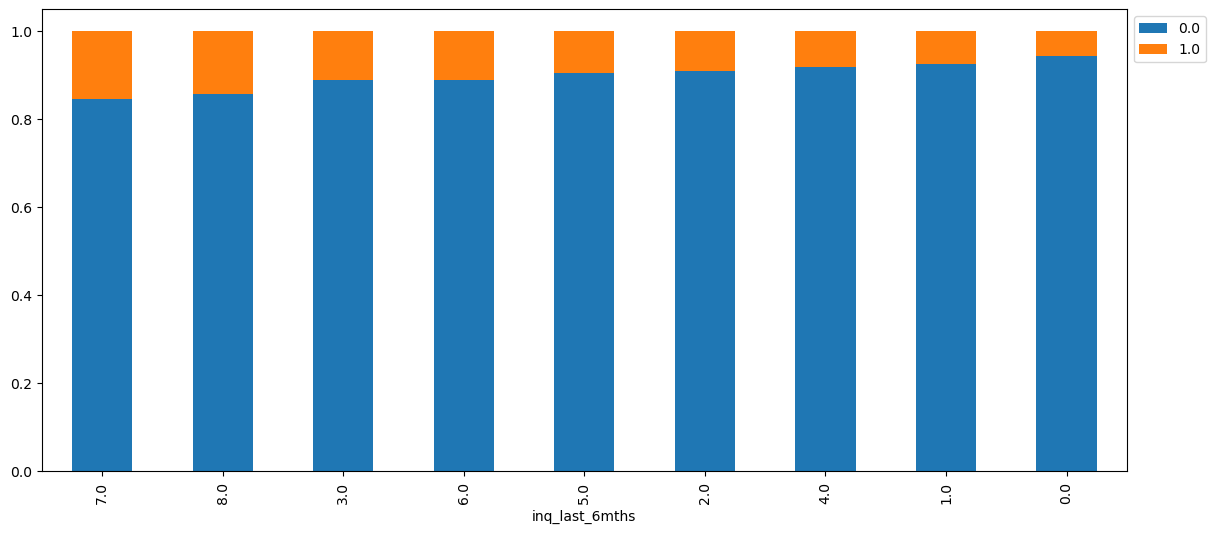

Column Name:inq_last_6mths

Category: 0.0
bad_flag % Yes =5.638858454635572
bad_flag % No =94.36114154536442

Category: 1.0
bad_flag % Yes =7.470224634403739
bad_flag % No =92.52977536559625

Category: 2.0
bad_flag % Yes =9.033912795668282
bad_flag % No =90.96608720433171

Category: 3.0
bad_flag % Yes =11.0485384821668
bad_flag % No =88.9514615178332

Category: 4.0
bad_flag % Yes =8.158906450234943
bad_flag % No =91.84109354976506

Category: 5.0
bad_flag % Yes =9.505208333333332
bad_flag % No =90.49479166666666

Category: 6.0
bad_flag % Yes =11.014492753623188
bad_flag % No =88.98550724637681

Category: 7.0
bad_flag % Yes =15.384615384615385
bad_flag % No =84.61538461538461

Category: 8.0
bad_flag % Yes =14.285714285714285
bad_flag % No =85.71428571428571


In [192]:
stacked_barplot(emp_years, "inq_last_6mths", "bad_flag")
compute_perc_distribution(emp_years, "inq_last_6mths", "bad_flag")

For inq_last_6mths and mths_since_recent_inq features, above charts tells us that, if there is a recent inquiry and more no. of inquiries in recent months then chances of bad loan is high than old inquirires. From mths_since_recent_inq chart, it shows that recent inquiries has 9% chances of bad loan. The % of chance is not reducing exponentially as if you check >6 months inquiry, but still there is a pattern. 
inq_last_6mths feature shows that the more number inquiries happend in last 6 months, more chances of bad loan.

**Analysis of loan_amnt, internal_score, annual_inc, dti, total_bc_limit, tot_hi_cred_lim, tot_cur_bal features**

Text(0, 0.5, 'internal_score')

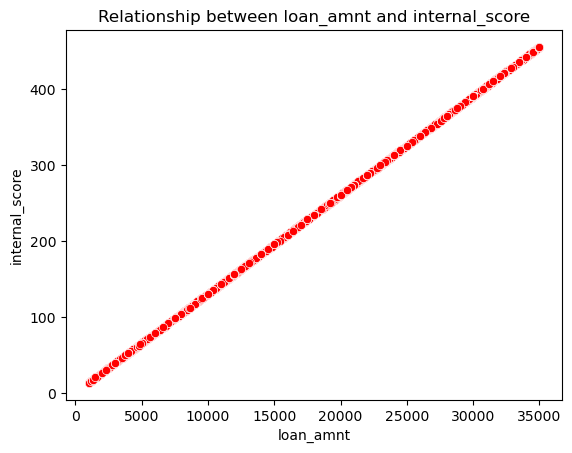

In [235]:
sns.scatterplot(x='loan_amnt', y='internal_score', data=data, color='red')

# Add titles and labels
plt.title("Relationship between loan_amnt and internal_score")
plt.xlabel("loan_amnt")
plt.ylabel("internal_score")

loan_amnt and internal_score are highly correlated and we can remove internal_score feature from our dataset.

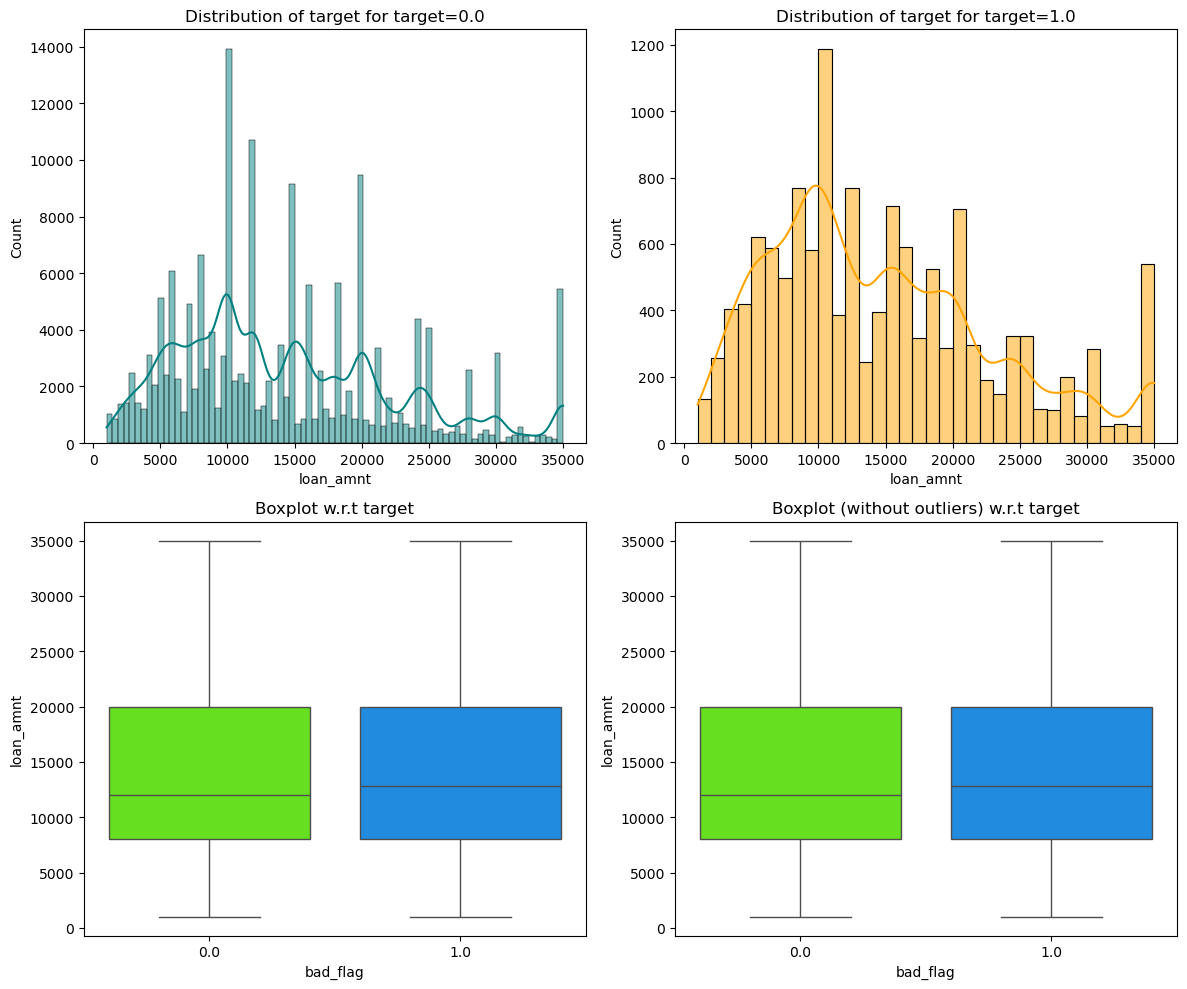

In [232]:
distribution_plot_wrt_target(data, "loan_amnt", "bad_flag")

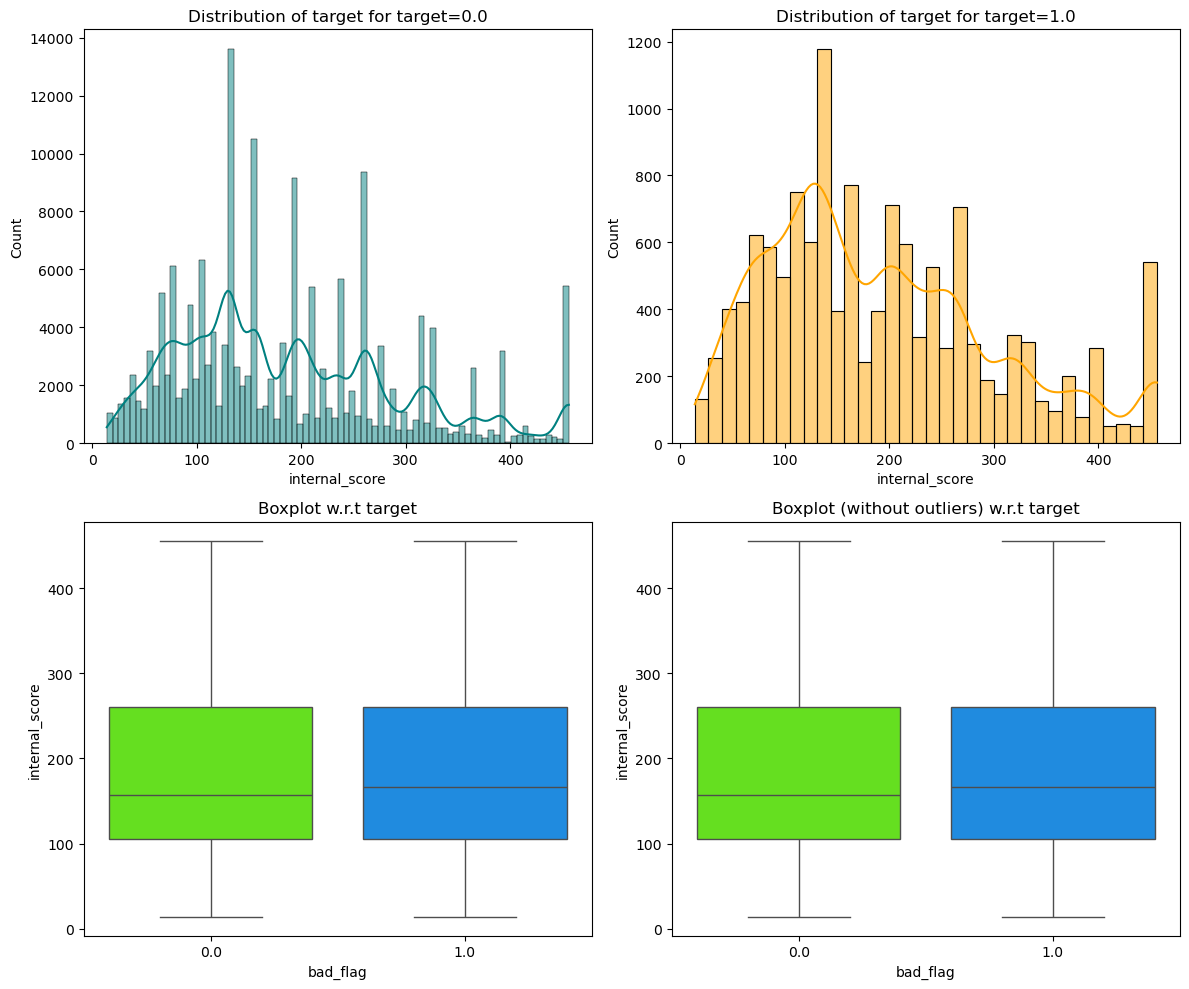

In [226]:
distribution_plot_wrt_target(data, "internal_score", "bad_flag")

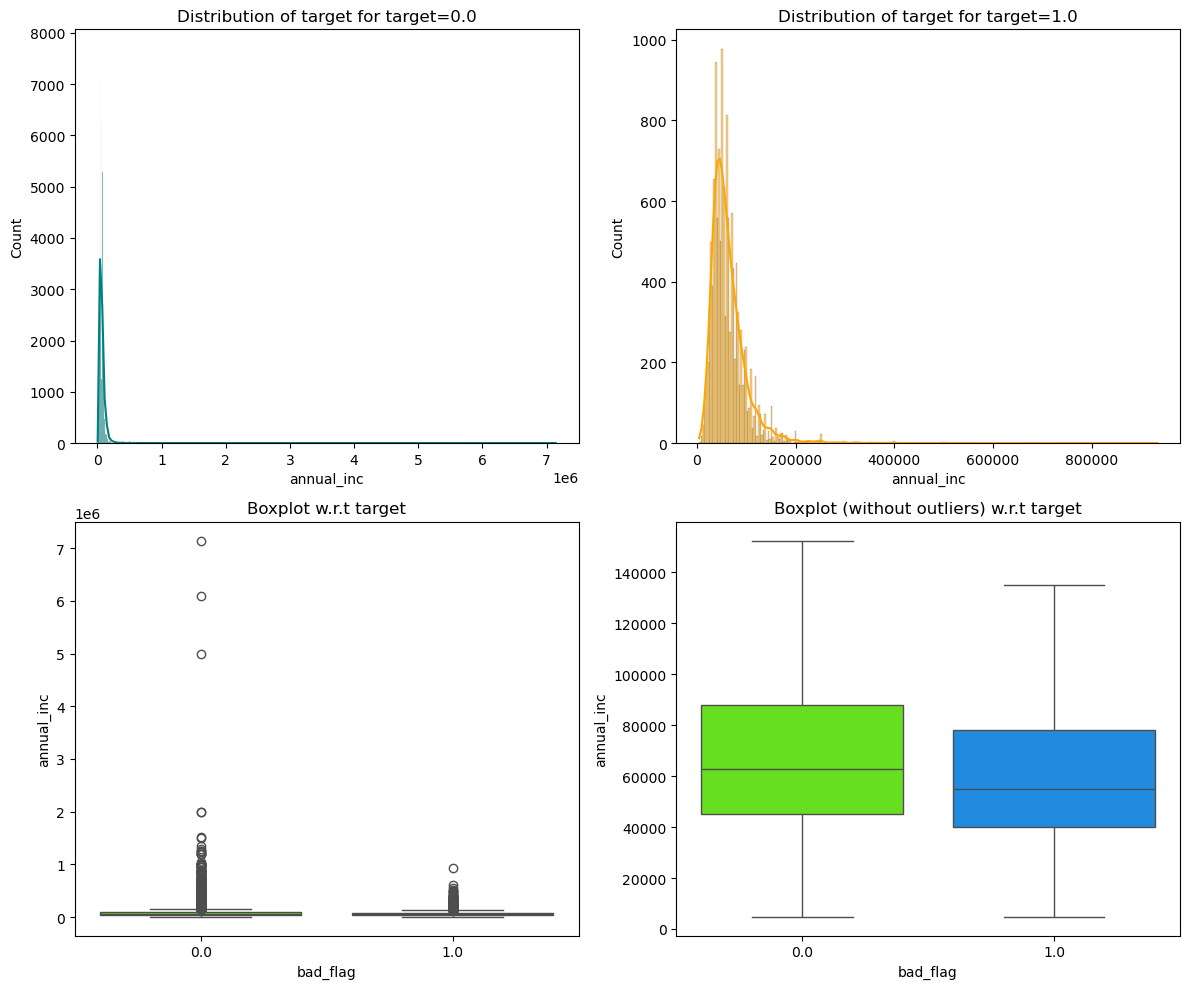

In [227]:
distribution_plot_wrt_target(data, "annual_inc", "bad_flag")

annual_income is right skewed when bad_laon=1 or 0. The income of mojority appliants who are taking lpad is <200k. The data has outliers, but these outliers can possibly true numbers as there might be the case where applicants has higher salary but their utilization is high and they are taking loan and their loans are defaulted. We can't simply remove the outliers if we dont know the exact reason. We can use robust scaling which handles outliers before training the data.

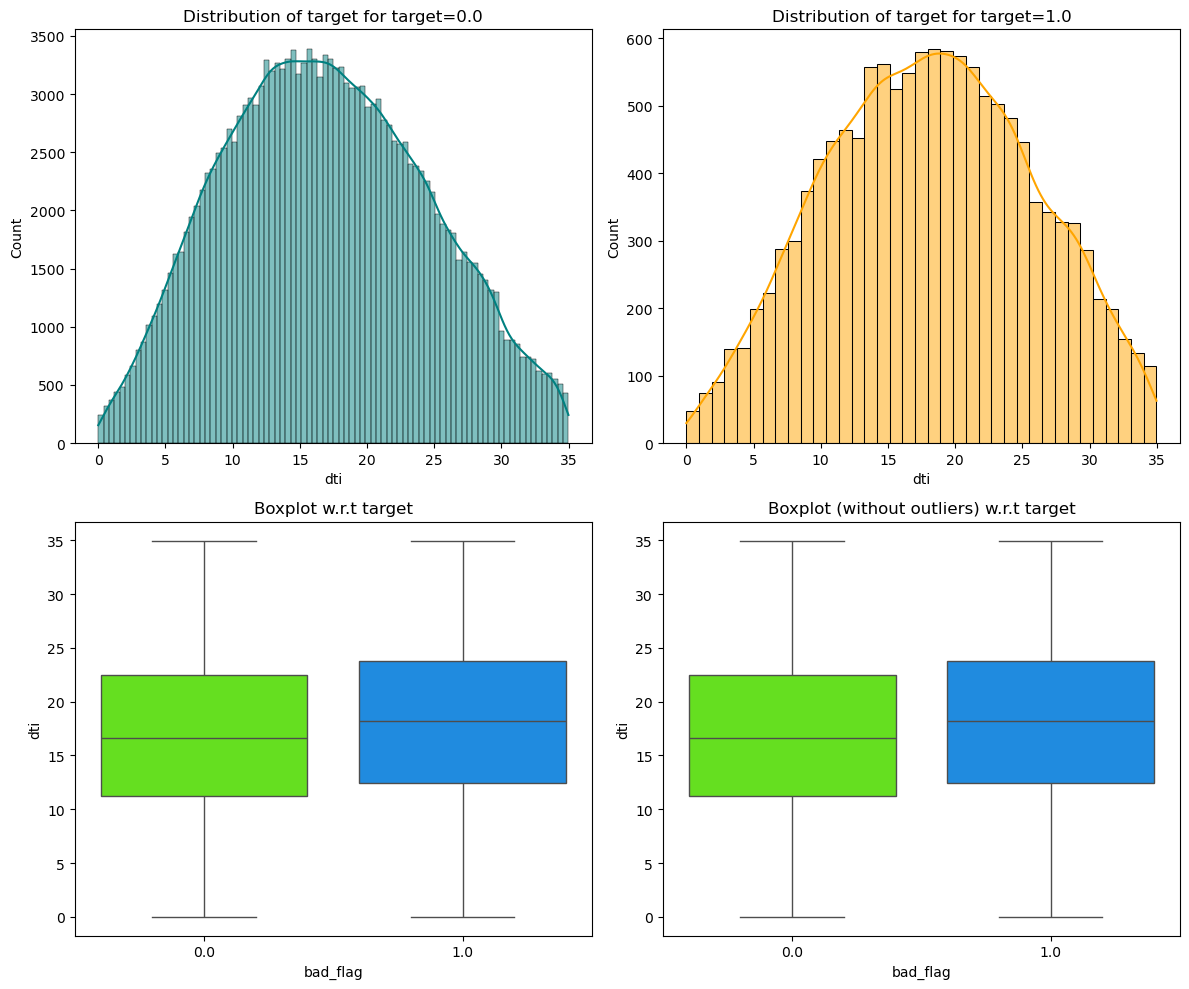

In [228]:
distribution_plot_wrt_target(data, "dti", "bad_flag")

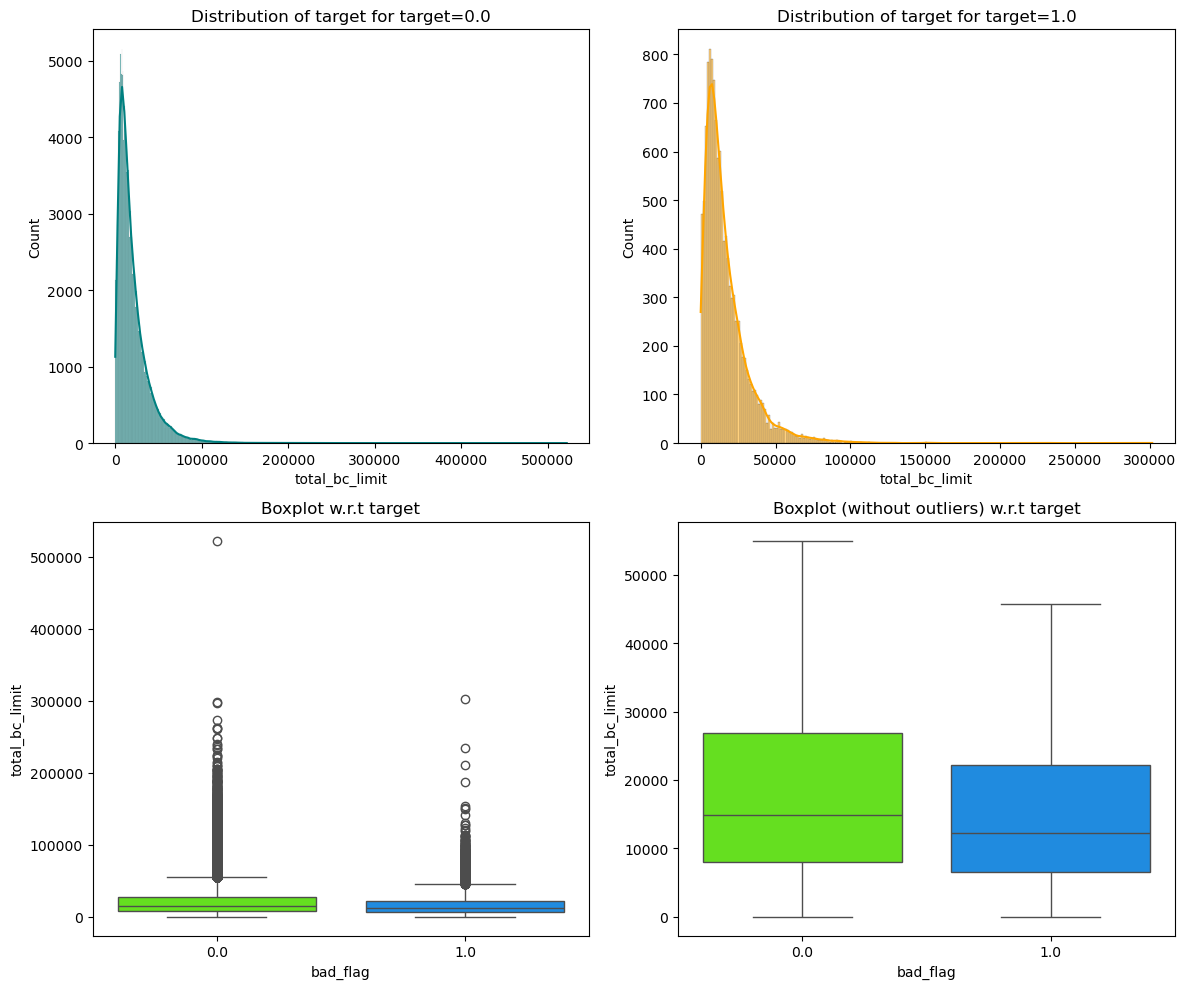

In [229]:
distribution_plot_wrt_target(data, "total_bc_limit", "bad_flag")

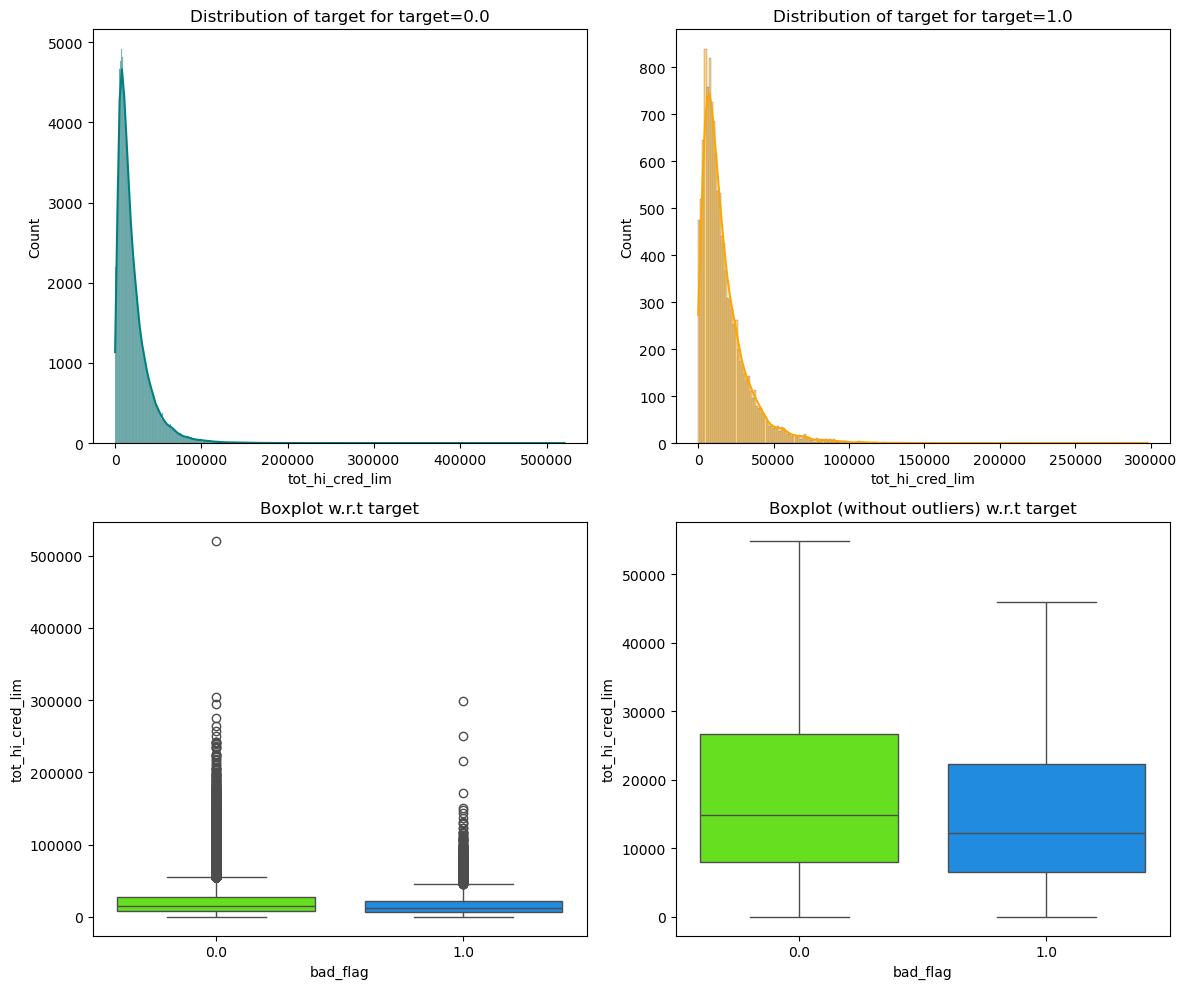

In [230]:
distribution_plot_wrt_target(data, "tot_hi_cred_lim", "bad_flag")

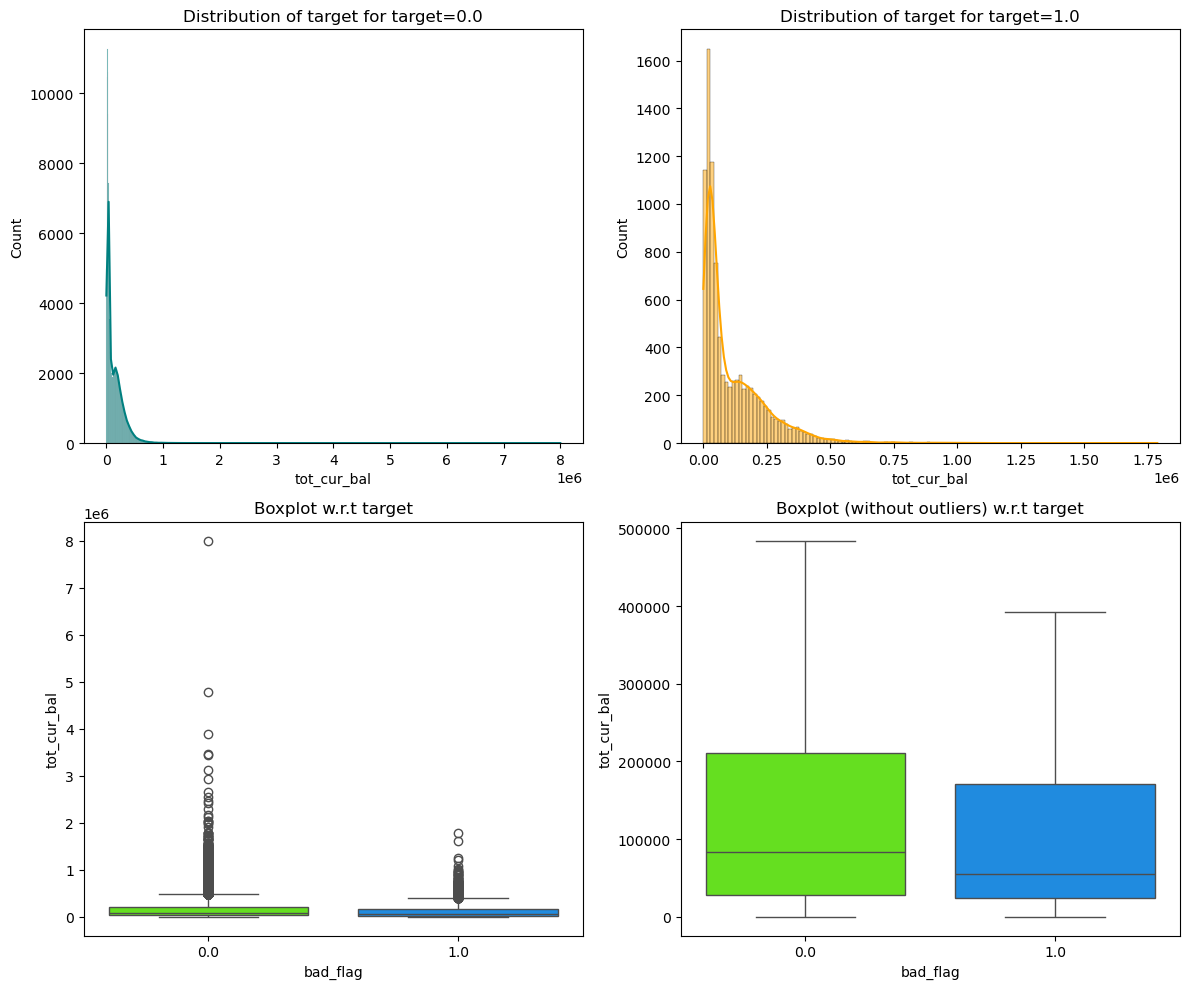

In [231]:
distribution_plot_wrt_target(data, "tot_cur_bal", "bad_flag")

total_bc_limit, tot_hi_cred_lim, tot_cur_bal features are right skewed. This says that the applicants have current balance and credit limits towards lower end. e.g., credit limit <50K. The applicants must be getting more credit cards to increase their credit limits. 
WHen comparing these three features with bad_flag, there is slight difference in data as you can see in box plots. (E.g. mean value is slightly less for the applicants whose load is defaulted vs not defaulted.)

**Missing Value Treatment**

In [223]:
total = len(data)
for column in data.columns:
    print("{}: {}%".format(column, round(data[column].isna().sum()/total*100)))

id: 0%
member_id: 0%
loan_amnt: 0%
term: 0%
int_rate: 0%
emp_length: 4%
home_ownership: 0%
annual_inc: 0%
desc: 57%
purpose: 0%
percent_bc_gt_75: 5%
bc_util: 5%
dti: 0%
inq_last_6mths: 0%
mths_since_recent_inq: 15%
revol_util: 0%
total_bc_limit: 4%
mths_since_last_major_derog: 83%
tot_hi_cred_lim: 4%
tot_cur_bal: 15%
application_approved_flag: 0%
internal_score: 0%
bad_flag: 0%
emp_length_yr: 4%


From above, we cay say that, we can remove desc and mths_since_last_major_derog features as they have >50% of missing data. 

**Target Variable bad_flag Analysis**

bad_flag
0.0    174995
1.0     13128
Name: count, dtype: int64


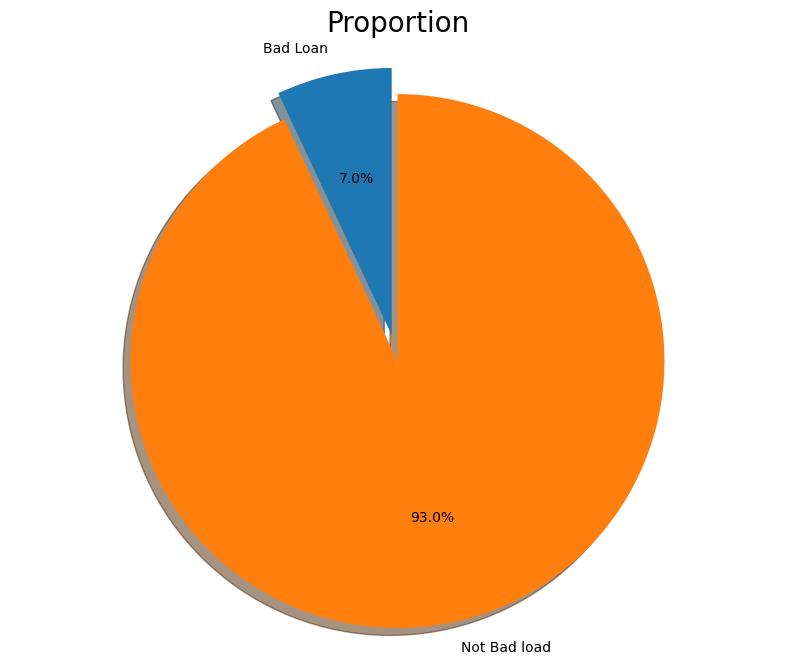

In [237]:
print(data['bad_flag'].value_counts())
labels = 'Bad Loan', 'Not Bad load'
sizes = [data.bad_flag[data['bad_flag']==1].count(),data.bad_flag[data['bad_flag']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

The class is highly imbalanced with 7% data in positive class. We will use oversampling technique for model training. 

### Business Insights from EDA Summary:
**Applicants with Higher Bankcard Utilization Pose Greater Risk:**

- The feature percent_bc_gt_75 indicates that the percentage of bankcard accounts exceeding 75% of their credit limit is significantly higher among applicants with bad loans. This suggests over-utilization of credit is a strong predictor of loan defaults.
- Actionable Insight: Implement stricter lending policies for applicants with high credit utilization rates. For instance, prioritize applicants whose bankcard utilization is below 50%.

**Recent and Frequent Credit Inquiries Indicate Higher Default Risk:**

- Features like inq_last_6mths and mths_since_recent_inq reveal that recent inquiries and a high number of credit inquiries within the last six months correlate with higher chances of loan default. This may indicate financial distress or a pattern of aggressive credit-seeking behavior.
- Actionable Insight: Introduce a threshold for the number of recent credit inquiries to assess an applicant's eligibility. For example, flag applicants with more than five inquiries in the past six months for closer scrutiny.

**Credit Limits and Current Balances Are Linked to Risk:**

- Features such as total_bc_limit, tot_hi_cred_lim, and tot_cur_bal are skewed toward lower values. Applicants with lower total credit limits and balances are more likely to default. This aligns with the notion that applicants with limited credit resources face greater financial constraints.
- Actionable Insight: Offer smaller loans to applicants with low credit limits and current balances to mitigate default risk. Additionally, assess whether these applicants are seeking loans to address temporary financial shortfalls.

**Annual Income Disparity Between Defaulters and Non-Defaulters:**

- The majority of applicants with defaulted loans earn less than $200K annually. While there are outliers with high incomes, these cases may involve high utilization or significant financial obligations.
- Actionable Insight: Tailor loan offerings based on income brackets. Consider capping loan amounts for applicants with annual incomes below a certain threshold to ensure affordability and reduce default rates.

**Cleaning and Simplification of Features Enhance Predictive Power:**

- Combining low-frequency categories (e.g., for home_ownership and purpose) and removing redundant features (e.g., internal_score) improves the dataset’s usability and predictive power. This step ensures that the model focuses on meaningful data.
- Actionable Insight: Regularly review and simplify application forms to collect only the most relevant information, reducing noise in data collection.

**Skewed Credit Behavior:**

- Features like revol_util and annual_income are skewed but contain valuable information. Outliers may represent applicants who earn high incomes yet face financial distress due to high credit utilization.
- Actionable Insight: Introduce robust scaling methods in the credit assessment process to account for skewness and prevent overlooking high-risk outliers.

**Effectiveness of Removing Features with Excessive Missing Data:**

- Features like desc and mths_since_last_major_derog have over 50% missing data and were removed, which improves model reliability by reducing noise.
- Actionable Insight: Encourage consistent and complete data collection in the application process to reduce missing data and improve future analysis.

**Loan Amount Correlation with Internal Scores:**

- loan_amnt and internal_score were highly correlated, indicating redundancy. Removing internal_score simplifies the dataset without losing significant predictive power.
- Actionable Insight: Focus on evaluating loan amounts in relation to other risk indicators rather than relying on potentially redundant internal scoring methods.

### Business Recommendations:

**Strengthen Creditworthiness Policies:**
- Leverage key predictors like percent_bc_gt_75, inq_last_6mths, and income levels to create a risk-based loan approval system. Higher-risk applicants should either be denied loans or offered loans at higher interest rates to mitigate risks.

**Enhance Credit Counseling Services:**
- For applicants with high credit utilization or frequent inquiries, provide financial counseling to help them manage their credit more effectively. This could also help reduce default rates over time.

**Implement Tiered Loan Offers:**
- Offer smaller loans to applicants with lower credit limits and balances. Alternatively, introduce tiered interest rates based on utilization and income levels to incentivize better financial behavior.

**Monitor Risky Behaviors Over Time:**
- Introduce a longitudinal credit monitoring system to track changes in applicants' credit utilization, inquiries, and balances over time. This will help predict emerging risks and act proactively to reduce defaults.

**Focus on High-Risk Segments:**
- Use insights from EDA (e.g., low credit limit, high utilization, frequent inquiries) to design stricter underwriting standards for segments that are more prone to defaults. For example, automatically flag applications where percent_bc_gt_75 exceeds 50%.

By implementing these strategies, the organization can improve its ability to identify high-risk loans, reduce defaults, and offer better-targeted products for different applicant segments.


### Next Steps:
**For Model training, we will perfrom below steps in model_training notebook:**

- Split data into 80-20 train-test split to train and test the model
- We can perform oversampling/understamping techniques to handle imbalanced dataset
- Data Transformation:
    - Remove the unnecessary features based on EDA.
    - feature engineering: convert int_rate, revol_util, emp_length into numerical
    - For categorical features:
        - combine less frequent categories into 'other'
        - impute missing values
        - Perform label encoding, one hot encoding
    - For numerical features:
        - Impute missing values
        - scaling
- Model training and testing